![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Equações diferenciais

Uma equação diferencial ordinária ("EDO") é dada pelo sistema
$$ \left\{\begin{align}
    f' & = F(t, f) \\
f(t_0) & = f_0.
\end{align}\right.$$
Uma **solução** da EDO é:
- uma função $g$; tal que
- $g(t_0) = f_0$; e
- $g'(t) = F(t, g(t))$.

Por questões práticas, também é comum dar um **intervalo de solução**, ou seja,
pedir que $g$ seja definida (pelo menos) num intervalo $[a,b]$ onde $t_0 \in [a,b]$.
Aqui, vamos usar $a = t_0$,
pensando "fisicamente" que a equação diferencial modela
a evolução de alguma quantidade $f$ que conhecemos agora ($t_0$)
e que queremos saber o quanto restará num momento futuro ($t_f = b$).

Por exemplo, se tomamos $F(t, f) = f$, a EDO pode ser escrita de forma compacta como $f' = f$,
cuja solução é uma função exponencial $f(x) = Ae^x$.
Note que **qualquer** valor de $A$ dá uma solução para a EDO $f' = f$,
e é neste ponto que a segunda equação é importante:
ao fixar $f(t_0) = f_0$, podemos determinar o valor de $A$.

# O método de Euler

Continuando nesta linha, é razoável discretizar o problema da seguinte forma:

1. Definimos uma sequência de pontos $a = t_0 < t_1 < t_2 < \cdots < t_n = t_f = b$ no intervalo $[a,b]$.
2. Como $f$ é derivável, temos a aproximação $f(t_{i+1}) \sim f(t_i) + f'(t_i) \cdot (t_{i+1} - t_i)$.
3. A equação diferencial permide calcular $f'(t_i) = F(t_i, f(t_i))$.
4. Isso define (recursivamente) uma sequência de aproximações para $f(t_j)$ pela fórmula
$$ f _ {j+1} = f_j +  F(t_j, f_j) \cdot (t _ {j+1} - t_j).$$

A sequência mais simples de ser usada é, claro, a de $n+1$ pontos igualmente espaçados no intervalo $[a,b]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Questão 1: Implementação do método de Euler

Escreva a função `euler` que dá uma aproximação numérica para a solução de uma EDO.
Sua função receberá:
- uma função $F$, a "equação diferencial";
- um `float` $t_0$, o tempo inicial;
- um `float` $t_f$, o tempo final;
- um `float` $f_0$, a condição inicial;
- o número $n$ de passos a serem tomados.

Em ambos os casos, a função deve retornar uma **lista** com os valores de $f_j$,
correspondentes às aproximações nos pontos $t_0$, $t_1$, $t_2$, até $t_f$.

In [2]:
def euler(F, t0,tf, f0, nsteps=100):
    step = (tf-t0)/nsteps
    interval = np.arange(t0, tf+step, step)
    f = [f0]
    for index in range(nsteps):
        f.append(f[index] + F(interval[index],f[index])*(interval[index+1] - interval[index]))
    return f

In [3]:
def F1(t,ft):
    return ft

f_100 = euler(F1, 0, 1, 1)
assert abs(f_100[-1] - 2.704813829421526) < 5e-15
assert len(f_100) == 101

In [4]:
f_100 = euler(F1, 1, 2, 1)
assert abs(f_100[-1] - 2.704813829421526) < 5e-15
assert len(f_100) == 101

Explique porque os testes acima são iguais, apesar de o tempo inicial ser diferente.

Por que apesar de o tempo inicial ser diferente, o valor inicial da função nesse tempo é o mesmo, para os dois casos.


O método de Euler permite resolver equações diferenciais bastante (arbitrariamente!) complicadas:

In [5]:
def F_dificil(t, ft):
    return t*np.sin(ft) - t**2*np.cos(ft)

f_dificil = euler(F_dificil, 0, 2, 1, nsteps=100)
assert np.isclose(f_dificil[50], 1.3280458347260922, atol=5e-15, rtol=5e-15)
assert np.isclose(f_dificil[-1], 3.553673725510754, atol=5e-15, rtol=5e-15)

In [6]:
f_dificil = euler(F_dificil, 0, 2, 1, nsteps=1000)
assert np.isclose(f_dificil[500], 1.337235075671101, atol=5e-15, rtol=5e-15)
assert np.isclose(f_dificil[-1], 3.5844631141202097, atol=5e-15, rtol=5e-15)

Como interpretar as diferenças e similaridades entre os dois testes acima?

É possível ver, pelos **asserts**, acima, que as aproximações, tanto para o ponto central do intervalo, quanto para o ponto final, desse mesmo intervalo, diferem a partir da segunda casa decimal. 

Enquanto para o primeiro caso, no ponto central, o valor de $f$ foi $1.3280458347260922$, no segundo caso foi $1.337235075671101$, havendo uma diferença de $-0.009189240945008725$.

Já para o priumeiro caso, no ponto final do interval, o valor de $f$ foi $3.553673725510754$, no segundo caso foi $3.5844631141202097$, havendo uma diferença de $-0.03078938860945568$.

Observando o plot da função identificada (não está mostrado aqui), é possível ver que a função, no intervalo dado é crescente, e que o resultado encontrado para a aproximação com método de Euler com menos passos se distancia, para baixo, em relação à aproximação com o método encontrado com mais passos.

Entretanto, para um incremento de dez vezes, no número de iterações, o erro parece ter ficado no máximo na segunda casa decimal da operação. Deve-se levar em conta o nível de precisão necessária no uso das funções obtidas pela resolução da equação diferencial para se considerar um grande aumento do número de iterações do uso do Método de Euler.

In [7]:
f_dificil = euler(F_dificil, 1, 3, 1, nsteps=1000)
assert len(f_dificil) == 1001
assert np.isclose(f_dificil[-1], 4.373105943363224, atol=5e-15, rtol=5e-15)

## Questão 2: Qualidade da aproximação

Voltamos à equação $f'(t) = f(t)$, cuja solução é a exponencial.

Faça um gráfico da solução numérica $f_{100}$ e da solução exata no intervalo $[0,1]$ no mesmo eixo.

Faça (em outro eixo) o gráfico da **diferença** entre estas soluções.

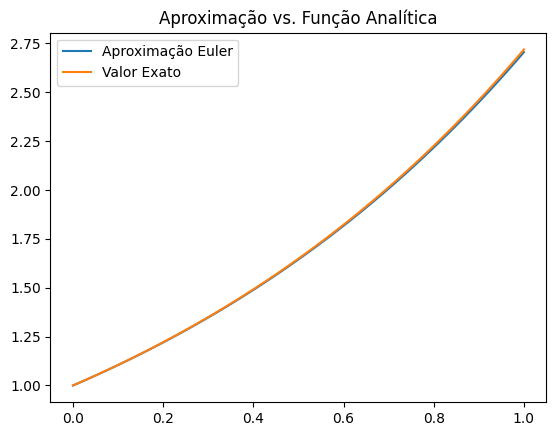

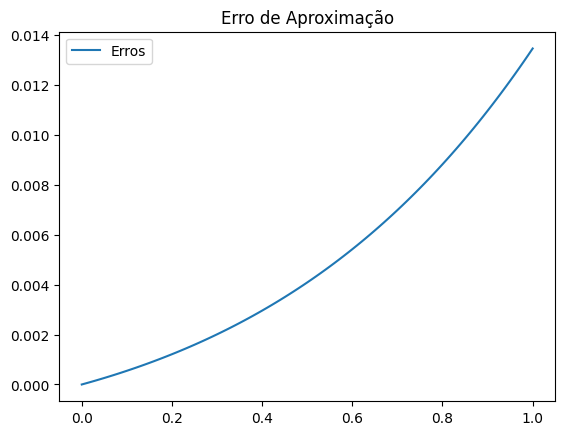

In [8]:
# YOUR CODE HERE
# Função que dá os pontos do intervalo, no qual f é calculada:
def interval(t0,tf,nsteps=100):
    step = (tf-t0)/nsteps
    i = np.arange(t0, tf+step, step)
    f = [t0]
    for index in range(nsteps):
        f.append(i[index+1])
    return f

x_100 = interval(0, 1)
exp_100 = np.exp(x_100)

plt.title("Aproximação vs. Função Analítica")
plt.plot(x_100, f_100, label="Aproximação Euler")
plt.plot(x_100, exp_100, label="Valor Exato")
plt.legend()
plt.show()

plt.title("Erro de Aproximação")
errors_100 = np.abs(exp_100 - f_100)
plt.plot(x_100, errors_100, label="Erros")
plt.legend()
plt.show()

## Questão 3: Medindo erros

Mesmo que em muitos casos seja bastante razoável usar o "erro final" $g(t_n) - f_n$,
onde $g$ é a solução exata e $f_n$ a aproximação,
vamos nos concentrar no "erro total".
E, para ficar relativamente simples, vamos usar a média dos valores absolutos das diferenças entre $g(t_j)$ e $f_j$.
Usamos a média, e não a soma, porque ao variar o número de passos esta quantidade se mantém homogênea.

In [9]:
def erro(g, fs, ts):
    """ Calcula o erro entre os valores de fs e g(ts). fs e ts devem ser vetores numpy. """
    return np.mean(abs(g(ts) - fs))

Como o erro médio diminui ao aumentar o número de passos efetuados?
Faça um gráfico.

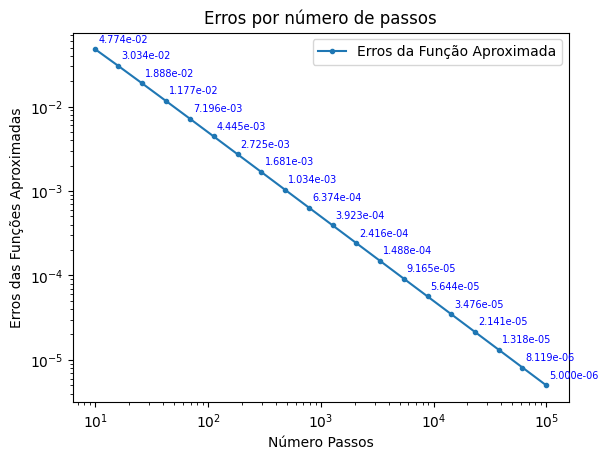

In [10]:
# YOUR CODE HERE
passos = [int(i) for i in np.floor(np.logspace(1, 5, 20, 10))]
aproximacoes = [(np.array(interval(0, 1, p)), np.array(euler(F1, 0, 1, 1, p))) for p in passos]

erros = [erro(np.exp, fs, ts) for ts, fs in aproximacoes]
plt.title("Erros por número de passos")
plt.xscale("log")
plt.yscale("log")
plt.plot(passos, erros, label="Erros da Função Aproximada", marker=".")
plt.ylabel("Erros das Funções Aproximadas")
plt.xlabel("Número Passos")
plt.legend()
for x,y in zip(passos,erros):
    label = "{:.3e}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(20,5), ha='center', size=7, color="blue") 

ax = plt.gca()

In [11]:
assert len(ax.lines) == 1
assert len(ax.get_title()) > 10
assert len(ax.get_xlabel()) > 10

In [12]:
l = ax.lines[0]
xs = l.get_xdata()

assert min(xs) < 100 < 10000 < max(xs)

In [13]:
ax = None

E comente o resultado.

É visível no gráfico acima que a relação entre o número de passos e o tamanho do erro, na aproximação numérica, é linear, com inclinação negativa, utilizando escala bi-logaritmica para o número de passos e para o valor do erro.

Isso significa que a relação entre o valor do erro em relação ao número de passos da aproximação é exponencialmente negativa, ou seja, $e(x) = C_{1}e^{-C_{2}n}$, onde $e(x)$ é o erro médio, $n$ é o número de passos e $C_{1}$ e $C_{2}$ são constantes, não determinadas para o caso aqui apresentado, mas que, de toda forma, existem e podem ser calculadas.

A conclusão mais forte é que é necessário aumentar exponencialmente o número de passos do Método de Euler para reduzir linearmente o valor do logaritmo do erro (que já é um logaritmo negativo, representando já uma redução modestíssima, a partir dos valores de redução de erro a partir de $10^{03}$, em uma inclinação exponencial fortíssima, lembrando, o gráfico é **bi-logaritmico**, significando se levou-se um aumento de n vezes para reduzir uma ordem de magnitude, seria necessário um novo aumento de n vezes para reduzir outra ordem de magnitude. Observe o aumento expressivo do número de passos, para que o erro caísse da ordem de magnitude de $10^{-2}$ para a de $10^{-3}$, de $10^{-3}$ para a de $10^{-4}$ e assim por diante, sempre aumentando, também, em ordens de magnitude para cada redução.  

Como principal conclusão, fica claro que o custo computacional para se chegar em um valor com margem de erro muito baixa (na ordem de grandeza de $10^{-7}$ ou abaixo), o custo computacional pode se tornar tão grande, a ponto de se tornar inviável, e se avaliar outros métodos de aproximação que sejam menos dispendiosos.

## Questão 4: Sistemas de Equações

O método de Euler é capaz de resolver (aproximar) **sistemas** de equações diferenciais.

Talvez você tenha que modificar o código da sua função `euler` para que ele seja "vetorial":
- a função pode receber um `np.array` com a condição inicial; e
- a função `F` que for passada deve, também, retornar um `np.array`.

Se for o caso, dê, abaixo, a nova função `euler`:

In [14]:
# YOUR CODE HERE

# Parece que não foi preciso mudar nada


Por exemplo, o sistema
$$ \begin{align}
f_1' & = f_2 \\
f_2' & = -f_1
\end{align} $$
que é equivalente à equação diferencial trigonométrica básica $y'' = -y$,
pode ser simulado assim:

In [15]:
def F2(t, ft):
    return np.array([ft[1],-ft[0]])

ans = np.array([-1.0505597866729235, -0.0010851561020816455])
v   = euler(F2, 0, np.pi, np.array([1,0]), nsteps=100)

assert np.allclose(v[-1], ans, atol=1e-15, rtol=1e-15)

Para usar as coordenadas da solução separadamente, ou seja, $f_1$ e $f_2$,
temos que transpor `v`.
(Note que os métodos constróem ao longo do tempo, e não por coordenadas)

In [16]:
v = np.transpose(v)

### 5. Mais gráficos

Observe que a solução numérica no intervalo $[0, \pi]$ realmente está próxima da solução analítica,
fazendo um gráfico com:
- a função que é solução da EDO,
- a sua derivada;
- a primeira coordenada da solução numérica;
- a segunda coordenada.

Note que, lendo a equação "ao contrário", temos $f_2 = f_1'$, ou seja,
a segunda coordenada está aproximando a derivada da primeira.

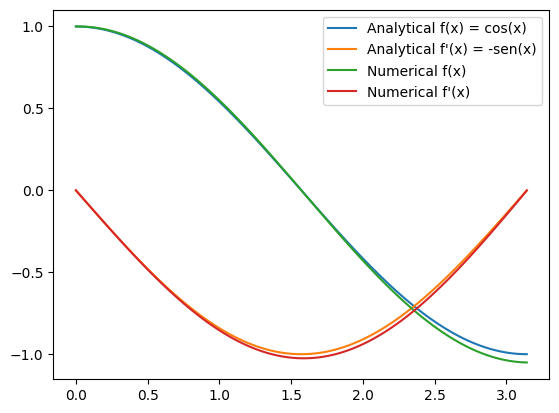

In [17]:
# A solução para a derivada acima é f(x) = cos(x), 
# pois f'(x) = -sen(x) e f''(x) = -cos(x) = -f(x) e f(0) = 1, f'(0) = 0
vx_100 = interval(0, np.pi, 100)
afx_100 = np.cos(vx_100) # Analytical f(x)
adfx_100 = - np.sin(vx_100) # Analytical f'(x)
nfx_100 = v[0] # Numerical f(x)
ndfx_100 = v[1] # Numerical f'(x)

plt.plot(vx_100, afx_100, label="Analytical f(x) = cos(x)")
plt.plot(vx_100, adfx_100, label="Analytical f'(x) = -sen(x)")
plt.plot(vx_100, nfx_100, label="Numerical f(x)")
plt.plot(vx_100, ndfx_100, label="Numerical f'(x)")
plt.legend()
ax = plt.gca()

In [18]:
assert len(ax.lines) == 4
assert len(ax.get_legend().texts) == 4

In [19]:
for l in ax.lines:
    xs = l.get_xdata()
    assert np.isclose(0, min(xs))
    assert np.isclose(np.pi, max(xs))

## Questão 6: Erros multidimensionais

Como se comporta o erro no caso do sistema acima, conforme o número de pontos aumenta?
Faça um gráfico.

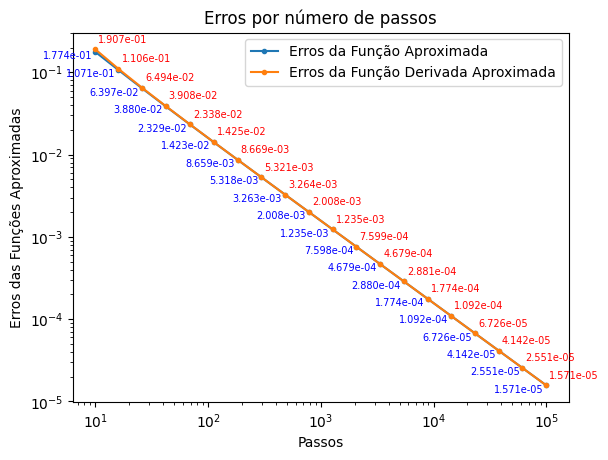

In [20]:
# YOUR CODE HERE
passos = [int(i) for i in np.floor(np.logspace(1, 5, 20, 10))]
aproximacoes = [(np.array(interval(0, np.pi, p)), np.transpose(euler(F2, 0, np.pi, np.array([1,0]), nsteps=p))) for p in passos]

erros_calc = [[erro(np.cos, fs[0], ts), erro(lambda _x: -np.sin(_x), fs[1], ts)] for ts, fs in aproximacoes]
erros = np.transpose(erros_calc)

plt.title("Erros por número de passos")
plt.xscale("log")
plt.yscale("log")
plt.plot(passos, erros[0], label="Erros da Função Aproximada", marker=".")
plt.plot(passos, erros[1], label="Erros da Função Derivada Aproximada", marker=".")
plt.ylabel("Erros das Funções Aproximadas")
plt.xlabel("Passos")
plt.legend()
for x,y in zip(passos,erros[1]):
    label = "{:.3e}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(20,5), ha='center', size=7, color="red") 

for x,y in zip(passos,erros[0]):
    label = "{:.3e}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(-20,-5), ha='center', size=7, color="blue") 

ax = plt.gca()

In [21]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

Qual erro é mais importante: o da derivada ($f_2$) ou o da função original ($f_1$)?
Você vê uma razão para isso?

Os erros das duas derivadas são igualmente importantes, porque o erro de uma função, $f_{1}$, se propaga para a outra função, $f_{2}$, e vice versa, para o cálculo incremental dos pontos das funções.   

O erro certamente depende do intervalo "de integração" da equação diferencial.
Será que a importância relativa também depende?

Escolha outro intervalo, e faça o gráfico dos erros em função de $n$ para a solução numérica.

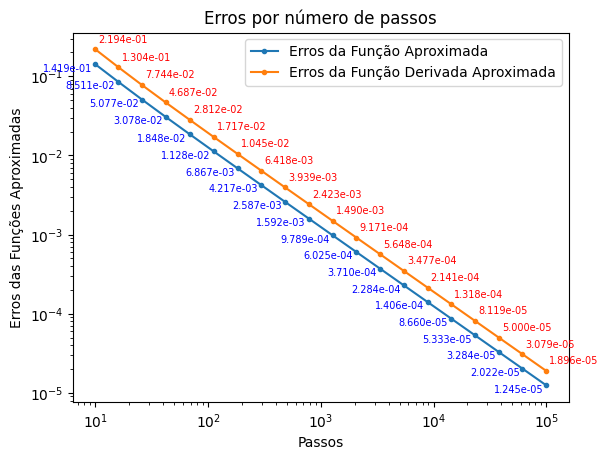

In [22]:
# YOUR CODE HERE
aproximacoes = [(np.array(interval(-np.pi/4, 3*np.pi/4, p)), np.transpose(euler(F2, -np.pi/4, 3*np.pi/4, np.array([2**(1/2)/2,2**(1/2)/2]), nsteps=p))) for p in passos]

erros_calc = [[erro(np.cos, fs[0], ts), erro(lambda _x: -np.sin(_x), fs[1], ts)] for ts, fs in aproximacoes]
erros = np.transpose(erros_calc)

plt.title("Erros por número de passos")
plt.xscale("log")
plt.yscale("log")
plt.plot(passos, erros[0], label="Erros da Função Aproximada", marker=".")
plt.plot(passos, erros[1], label="Erros da Função Derivada Aproximada", marker=".")
plt.ylabel("Erros das Funções Aproximadas")
plt.xlabel("Passos")
plt.legend()
for x,y in zip(passos,erros[1]):
    label = "{:.3e}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(20,5), ha='center', size=7, color="red") 

for x,y in zip(passos,erros[0]):
    label = "{:.3e}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(-20,-5), ha='center', size=7, color="blue") 

Agora, escolha um valor de $n$, e faça o gráfico dos erros:
- uma curva com o erro da primeira coordenada para a função cosseno;
- outra com o erro da segunda coordenada para a derivada do cosseno.

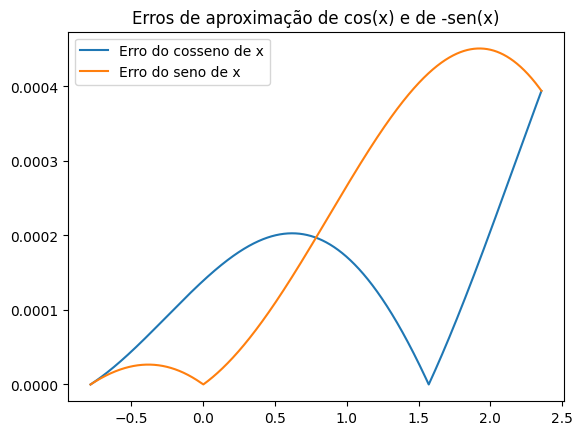

In [23]:
# YOUR CODE HERE
  
aproximacao_x = aproximacoes[14][0] # 8858 passos
aproximacao_cos = aproximacoes[14][1][0]
aproximacao_sen = aproximacoes[14][1][1]

erro_cos = np.abs(aproximacao_cos - np.cos(aproximacao_x))
erro_sen = np.abs(aproximacao_sen - (-np.sin(aproximacao_x)))
plt.title("Erros de aproximação de cos(x) e de -sen(x)")
plt.plot(aproximacao_x, erro_cos, label="Erro do cosseno de x")
plt.plot(aproximacao_x, erro_sen, label="Erro do seno de x")
plt.legend()

ax = plt.gca()

In [24]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2
assert len(ax.get_title()) >= 10

E comente

Fica visível que o erro é ínimo quando a função cosseno é próxima de $\frac{\pi}{2}$ e quando a função seno é próxima de $0$. O erro é máximo próximo de $\frac{\pi}{4}$, na cosseno e $\frac{\pi}{2}$ na seno. Os pontos mínimos de erro, tanto na função cosseno, quanto na função seno, parecem ser relacionados aos pontos em ambas as funções nas quais elas se aproximam muito bem de uma função linear, e o erro é máximo quando esse desvio da função linear é máximo também.


### Observação: Equações diferenciais e Integrais

Calcular a integral $\int_a^b h(t) dt$ é a mesma coisa que resolver a equação diferencial
$$ \begin{cases}
  f'(t) & = h(t) \\
  f(a)  & = 0,
\end{cases} $$
pelo Teorema Fundamental do Cálculo.
Portanto, é possível implementar o método do retângulo usando a função `euler`.

Isso é verdade para vários métodos de integração: muitas vezes existe um método de Equações Diferenciais cujo caso particular é um método de integração quando a ED é "trivial".